# Satellite image classification

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading datasets
X_train = pd.read_csv('./data/X_train_sat4.csv',header=None)
y_train = pd.read_csv('./data/y_train_sat4.csv',header=None)
X_test = pd.read_csv('./data/X_test_sat4.csv', header=None, engine='python') #This one give me an error because of the format of the data, so I used the engine='python' argument 
y_test = pd.read_csv('./data/y_test_sat4.csv', header=None)

In [3]:
# View the first 5 rows
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,104,103,94,133,114,115,106,145,104,110,...,95,141,101,103,92,138,103,110,99,148
1,175,149,130,146,169,148,130,141,166,139,...,119,132,137,133,121,134,134,128,119,132
2,113,114,105,163,126,131,125,176,119,125,...,129,177,122,126,113,172,130,136,131,181
3,107,104,100,124,108,105,102,126,105,104,...,74,85,74,70,63,78,83,79,73,92
4,105,100,95,132,77,72,62,114,76,77,...,86,129,106,100,85,128,118,109,99,130


When you used pd.read_csv function, you get a dataframe. What we need is a numpy array, so we can easy convert it by using np.array function. 

In [4]:
# Converting to numpy array and normalizing images.
X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)

In [5]:
# Viewing the shape of the training images
X_train.shape

(400000, 3136)

We got 400,000 images in the training set, but they have not the right shape, so we have to reshape the image data before continue.

In [6]:
# Reshaping the images
X_train = X_train.reshape(X_train.shape[0],28,28,4).astype(float)
X_test = X_test.reshape(X_test.shape[0],28,28,4).astype(float)

In [7]:
X_train.shape

(400000, 28, 28, 4)

The images has the right  shape, we can save those image to avoid processing the data in the future.

In [8]:
np.save('dataset/X_train.npy',X_train)
np.save('dataset/X_test.npy',X_test)
np.save('dataset/y_train.npy',y_train)
np.save('dataset/y_test.npy',y_test)

In [9]:
X_train = np.load('dataset/X_train.npy')
y_train = np.load('dataset/y_train.npy')
X_test = np.load('dataset/X_test.npy')
y_test = np.load('dataset/y_test.npy')

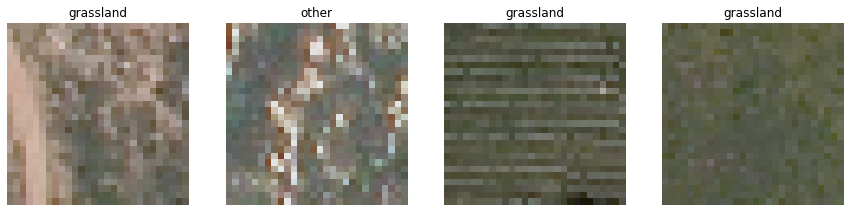

In [10]:
# Ploting some images.
fig = plt.figure(figsize=(15, 13))
columns = 4
rows = 1
ax = []
y_names = ['barren land', 'trees', 'grassland', 'other']
y_train_names = [y_names[i] for i in np.argmax(y_train,axis=1)]
for i in range(columns*rows):
    n = np.random.randint(X_train.shape[0])
    ax.append(fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(y_train_names[n])
    plt.axis('off')
    plt.imshow(X_train[n,:,:,0:3])